In [93]:
from PIL import Image
import csv
import os
from torch.utils.data import Dataset
import pandas as pd
from torchvision.io import read_image
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import DataLoader
import torch.optim as optim
import torchvision.transforms as transforms
import torch
import cv2
import numpy as np
from torch.utils.tensorboard import SummaryWriter
from torchvision import models as models
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from torch.utils.data import Dataset
from numpy import argmax
from sklearn.model_selection import train_test_split

imagepath = 'C:/Users/thoma/Documents/Softwareudvikling/Deep_learning/Eksamensprojekt/kode/DeepLearning/DatasætDeeplearning/license_plates_detection_train/'
csvpath = 'C:/Users/thoma/Documents/Softwareudvikling/Deep_learning/Eksamensprojekt/kode/DeepLearning/DatasætDeeplearning/license_plates_detection_train.csv'
croppedImagesPath = 'C:/Users/thoma/Documents/Softwareudvikling/Deep_learning/Eksamensprojekt/kode/DeepLearning/DatasætDeeplearning/croppedImages/'
trainingdatacsvpath = 'C:/Users/thoma/Documents/Softwareudvikling/Deep_learning/Eksamensprojekt/kode/DeepLearning/trainingdata.csv'
predictioncsvpath = 'C:/Users/thoma/Documents/Softwareudvikling/Deep_learning/Eksamensprojekt/kode/DeepLearning/DatasætDeeplearning/license_plates_recognition_train.csv'

#imagepath = 'C:/Users/chris/source/repos//DeepLearning/DatasætDeeplearning/license_plates_detection_train/'
#csvpath = 'C:/Users//chris//source/repos//DeepLearning/DatasætDeeplearning/license_plates_detection_train.csv'
#croppedImagesPath = 'C:/Users//chris//source/repos//DeepLearning/DatasætDeeplearning/croppedImages/'
#trainingdatacsvpath = 'C:/Users/chris/source/repos//DeepLearning/DatasætDeeplearning/trainingdata.csv'
#predictioncsvpath = 'C:/Users//chris/source/repos//DeepLearning/DatasætDeeplearning/license_plates_recognition_train.csv'


In [94]:
#Opgave 1
class ImageData:
    def __init__(self, path, ymin, xmin, ymax, xmax):
        self.path = path
        self.xmin = xmin      
        self.ymin = ymin        
        self.xmax = xmax        
        self.ymax = ymax

In [95]:
def read_image_data():
    file = open(csvpath)
    csvreader = csv.reader(file)
    rows = []
    next(csvreader)
    for row in csvreader:
            id = ImageData(row[0], int(row[1]), int(row[2]), int(row[3]), int(row[4]))
            rows.append(id)
    file.close()
    return rows


In [96]:
os.makedirs(croppedImagesPath, exist_ok=True)

def crop_images():
    imageData = read_image_data()

    for id in imageData:
        im = Image.open(imagepath + id.path)
        im = im.crop( (id.xmin, id.ymin, id.xmax, id.ymax) )
        im.save(croppedImagesPath + id.path) 
        im.close()

crop_images()

In [97]:
#Opgave 2
class PredictionData:
    def __init__(self, path, licenseplate):
        self.path = path
        self.licenseplate = licenseplate

In [98]:
def read_prediction_data():
    file = open(predictioncsvpath)
    csvreader = csv.reader(file)
    rows = []
    next(csvreader)
    for row in csvreader:
            pd = PredictionData(row[0], row[1])
            rows.append(pd)
    file.close()
    return rows


In [99]:
def onehot_encoding():
    predictiondata = read_prediction_data()
    numbers = '0123456789'
    onehot_encoded = list()
    header = ['img_id', 'text', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

    with open(trainingdatacsvpath, 'w', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(header)
       

        for data in predictiondata:
            # Removes T and N from licenseplate
            datatrimmed = data.licenseplate.replace('T', '')
            datatrimmed = datatrimmed.replace('N', '')

            char_to_int = dict((c, i) for i, c in enumerate(numbers))
            # integer encode input data
            integer_encoded = [char_to_int[char] for char in datatrimmed]
            #print(integer_encoded)
            # one hot encode
            letter = [0 for _ in range(len(numbers))]
            for value in integer_encoded:
                letter[value] = 1
            
            letter.insert(0, data.path)
            letter.insert(1, data.licenseplate)
            writer.writerow(letter)
            onehot_encoded.append(letter)

onehot_encoding() 
    

In [100]:
#Opgave 3
with open(trainingdatacsvpath) as trainingcsv:
    next(trainingcsv)
    file_read = csv.reader(trainingcsv)
    array = list(file_read)

train, test = train_test_split(array,test_size=0.25,random_state=10) #Det unikke seed nummer er 10
header = ['img_id', 'text', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

pd.DataFrame(test).to_csv("test.csv",header=header,index=False)
pd.DataFrame(train).to_csv("train.csv",header=header,index=False)


In [101]:
#Opgave 4
def show_data_from_csv(csv_filepath: str):
    csv_data = pd.read_csv("test.csv")
    print("CSV shape:", csv_data.shape) 
    print("CSV head:")
    print(csv_data.head()) #det samme som csv_data[:5]
    print("CSV tail:")
    print(csv_data.tail()) #det samme som csv_data[-5:]

show_data_from_csv("test.csv") #"train.csv"


CSV shape: (225, 12)
CSV head:
    img_id      text  0  1  2  3  4  5  6  7  8  9
0  498.jpg  148T4932  0  1  1  1  1  0  0  0  1  1
1  217.jpg  174T4999  0  1  0  0  1  0  0  1  0  1
2  677.jpg  130T2637  1  1  1  1  0  0  1  1  0  0
3  276.jpg  148T2903  1  1  1  1  1  0  0  0  1  1
4  307.jpg  141T6603  1  1  0  1  1  0  1  0  0  0
CSV tail:
      img_id      text  0  1  2  3  4  5  6  7  8  9
220  175.jpg  175T7944  0  1  0  0  1  1  0  1  0  1
221  832.jpg   105T294  1  1  1  0  1  1  0  0  0  1
222  703.jpg   89T4187  0  1  0  0  1  0  0  1  1  1
223  764.jpg  156T4000  1  1  0  0  1  1  1  0  0  0
224  395.jpg  189T8840  1  1  0  0  1  0  0  0  1  1


In [102]:
TRANSFORM_IMG = transforms.Compose([
    transforms.Resize(25),
    transforms.CenterCrop(25),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225] )
    ])

imagenet_data = torchvision.datasets.ImageFolder(root="DatasætDeeplearning/",transform=TRANSFORM_IMG)

trainloader = torch.utils.data.DataLoader(imagenet_data, batch_size=4,
                                        shuffle=True, num_workers=0)


testloader = torch.utils.data.DataLoader(test, batch_size=4,
                                        shuffle=False, num_workers=0)

In [103]:
# helper function to show an image
# (used in the `plot_classes_preds` function below)
def matplotlib_imshow(img, one_channel=False):
    if one_channel: #Der er kun en kanal
        img = img.mean(dim=0)
    img = img / 2 + 0.5  #unnormalize, for at få den tilbage til den oprindelige til det neurale netværk (der kan godt udkommenteres)
    npimg = img.numpy()
    if one_channel: #Hvis der kun er en kanal blier det grå billeder 
        plt.imshow(npimg, cmap="Greys")
    else: #Hvis der er flere kanaler bliver det favet billeder 
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [104]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(in_features=144, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)#linear layer som har input features 84 og output feature 10. 

        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))#max pooling med en pooling shape på 2x2 over det første 2D convolutional layer
        x = self.pool(F.relu(self.conv2(x)))#max pooling med en pooling shape på 2x2 over det andet 2D convolutional layer
        x = x.view(-1, 9 * 4 * 4) #Ændrer formen på tensors.
        x = F.relu(self.fc1(x))#Linear layer bliver aktiveret via activation function 
        x = F.relu(self.fc2(x))#Linear layer bliver aktiveret via activation function 
        x = self.fc3(x)
        return x


model = Model()

In [105]:
criterion = nn.CrossEntropyLoss() #Bliver brugt til classification Logits --> softmax --> out probabilities opdeling i classes
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) 

In [106]:
writer = SummaryWriter('runs/numberplate_experiment_1') 

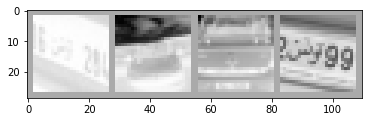

In [107]:
# get some random training images
dataiter = iter(trainloader) #Opretter en iterator, hvor den tager trainloader som parameter
images, labels = next(iter(trainloader))

writer.add_graph(model, images) #Tilføjer grafdata, tager imode vores model (net) og modeldata (images), som pararmetre

# create grid of images
img_grid = torchvision.utils.make_grid(images) #Laver et grid af vores billeder iform af et tensor

# show images
matplotlib_imshow(img_grid, one_channel=True) #Kalder vores funktion, som vi har defineret højere oppe i koden

# write to tensorboard
writer.add_image('numberplate_images', img_grid) #Data tilføjes til vores tensorborad
writer.close()

In [110]:
# Look at training curves in tensorboard:
%load_ext tensorboard 
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 3392), started 7 days, 1:07:11 ago. (Use '!kill 3392' to kill it.)